<a href="https://colab.research.google.com/github/axrd/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [81]:
# TODO
import pandas as pd

# Loading and assigning column names:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data')
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df.shape
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [0]:
# UCI lists missing values as follows:
    # A1:  12
    # A2:  12
    # A4:   6
    # A5:   6
    # A6:   9
    # A7:   9
    # A14: 13
    
# Going by columns we can find missing values and how they're written:
#df.A14.value_counts()

# They're all labeled as '?'. In total 37 cases (~5%) of missing data across the df. 


In [0]:
# Since it's only 5% of the data, I dropped all the rows that had missing values for now.  
df = df[df != '?']


In [83]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [0]:
# A2 and A14 are supposed to continous but have a dtype of object. Changing them to floats. 
df['A2'] = df.A2.astype(float)
df['A14'] = df.A14.astype(float)


In [85]:
df.A14.describe()

count     676.000000
mean      183.988166
std       173.934087
min         0.000000
25%        74.500000
50%       160.000000
75%       277.000000
max      2000.000000
Name: A14, dtype: float64

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" between them and the class label, and apply the Chi-squared test to them. There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end. This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# TODO
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

In [87]:
import seaborn as sns
sns.__version__
#!pip install seaborn --upgrade

'0.9.0'

In [88]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,+


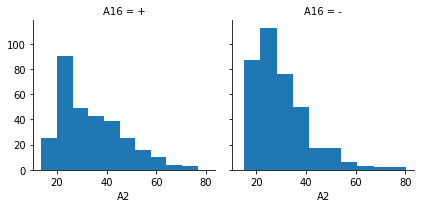

In [89]:
# Visualizing the continuous attributes against class (+,-):
g = sns.FacetGrid(df, col="A16")
g.map(plt.hist, "A2");

# A2 appears to have little bearance on class. 

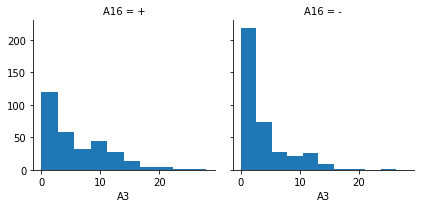

In [90]:
g = sns.FacetGrid(df, col="A16")
g.map(plt.hist, "A3");

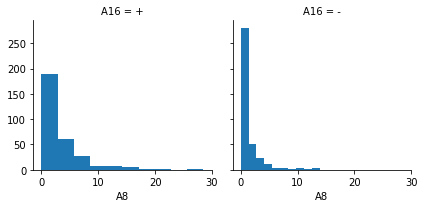

In [91]:
g = sns.FacetGrid(df, col="A16")
g.map(plt.hist, "A8");

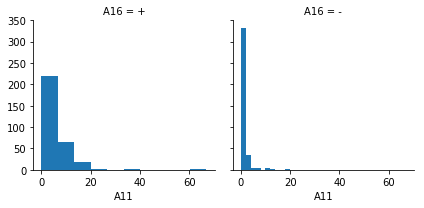

In [92]:
g = sns.FacetGrid(df, col="A16")
g.map(plt.hist, "A11");

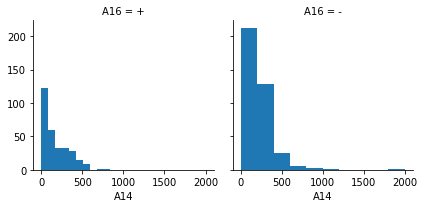

In [93]:
g = sns.FacetGrid(df, col="A16")
g.map(plt.hist, "A14");

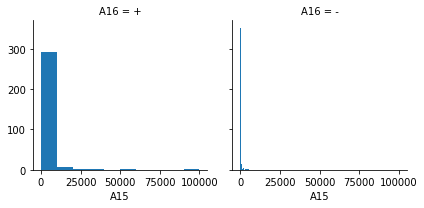

In [94]:
g = sns.FacetGrid(df, col="A16")
g.map(plt.hist, "A15");

In [0]:
# In order to run some tests I'm going to change A16 to a bolean of 1 & 0 for approved or not, respectively. 
df.A16.replace("+", 1, inplace=True)
df.A16.replace("-", 0, inplace=True)


In [96]:
mu = df.A16.mean()
mu
# We can see that it's slightly more likely to be rejected than approved. 

0.444121915820029

In [0]:
# Going to look at A15 and A3. Grouping them by acceptance, or rejection (A16) so we can compare them using the t test later. 
# Creating 2 dataframes based on A16 class:
yay = df[df.A16 == 1]
nay = df[df.A16 == 0]

In [119]:
stats.ttest_ind(yay.A3, nay.A3)

# We can reject the null hypothesis as p<0.5

Ttest_indResult(statistic=5.5785223709472715, pvalue=3.490724496507552e-08)

In [120]:
stats.ttest_ind(yay.A15, nay.A15)

# We can reject he null hypothesis p<0.5

Ttest_indResult(statistic=4.69003486307862, pvalue=3.296216085672561e-06)

In [0]:
# Now to use the Chi Square to evaluate categorical values. 
from scipy.stats import chi2_contingency



## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**For the T-Tests I ran, both resulted in a really small p-value of < 0.5. This led me to reject the null hypothesis for A3 and A15 that their means were not statistically significantly different. That would lead me to believe that they hold some significant predictive power over whether or not credit is approved or denied.**




*Your words here!*